In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning_Funct as clean

### Clean the original Dataframe

In [2]:
df = clean.clean_dataframe('../data/Catalunya2.xls')

In [3]:
df.head()

,Name,Activity_Code,Zip_Code,Province,Revenue(k),EBITDA(k),Net_Income(k),Total_Assets(k),Equity(k),Employees,Liabilities(k),Net_Income_Margin(%),EBITDA_Margin(%),Debt_Ratio(%),Industry
0,SEAT SA,2910,8760,Barcelona,11423000,746700,345600,5843000,1991400,14667,3851600,3.025475,6.536812,65.918193,Manufacturing
1,LIDL SUPERMERCADOS SAU,4711,8110,Barcelona,4443165,362517,172642,2921430,1175303,11689,1746127,3.885564,8.158981,59.769599,Wholesale & Retail Trade; Repair of Vehicles
2,VOLKSWAGEN GROUP ESPAÑA DISTRIBUCION SA.,4511,8820,Barcelona,3991886,42720,20355,1785219,137196,439,1648023,0.509909,1.070171,92.314892,Wholesale & Retail Trade; Repair of Vehicles
3,BUNGE IBERICA SA,4621,8960,Barcelona,3065238,1595,42700,710088,374977,429,335111,1.393040,0.052035,47.192883,Wholesale & Retail Trade; Repair of Vehicles
4,"VUELING AIRLINES, SA",5110,8820,Barcelona,2481046,166733,132237,2565643,384408,4438,2181235,5.329889,6.720270,85.017089,Transportation & Storage


In [4]:
df.dtypes

Name                     object
Activity_Code            object
Zip_Code                  int64
Province                 object
Revenue(k)                int64
EBITDA(k)                 int64
Net_Income(k)             int64
Total_Assets(k)           int64
Equity(k)                 int64
Employees                 int64
Liabilities(k)            int64
Net_Income_Margin(%)    float64
EBITDA_Margin(%)        float64
Debt_Ratio(%)           float64
Industry                 object
dtype: object

In [5]:
#df.to_csv('cleancompaniesnoregion.csv', encoding='utf-8')

### Generate the Merged Dataframe to get the Regions

In [6]:
merged = clean.get_ziptoregion('../data/CP_Municipis2.csv', '../data/Municipis_Cat3.csv')

In [7]:
merged.head()

,ID,Zip_Code,Town_Code,Town,Region_Code,Region
0,1,8630,80018,Abrera,11.0,Baix Llobregat
1,2,8256,80023,Aguilar de Segarra,7.0,Bages
2,3,8281,80023,Aguilar de Segarra,7.0,Bages
3,4,8328,80039,Alella,21.0,Maresme
4,5,8587,80044,Alpens,24.0,Osona


In [8]:
merged.shape

(1135, 6)

In [9]:
merged.dtypes

ID               int64
Zip_Code         int64
Town_Code        int64
Town            object
Region_Code    float64
Region          object
dtype: object

In [10]:
#merged.to_csv('ziptoregion.csv', encoding='utf-8')

### Join the 2 dataframes to get Region Code and Region Name in the Company Dataframe

In [11]:
df = clean.join_zip_to_company('../data/cleancompaniesnoregion.csv', '../data/ziptoregion.csv')

In [12]:
df.shape

(65066, 18)

In [13]:
df.head()

,Name,Activity_Code,Zip_Code,Province,Revenue(k),EBITDA(k),Net_Income(k),Total_Assets(k),Equity(k),Employees,Liabilities(k),Net_Income_Margin(%),EBITDA_Margin(%),Debt_Ratio(%),Industry,Town,Region_Code,Region
0,SEAT SA,2910,08760,Barcelona,11423000,746700,345600,5843000,1991400,14667,3851600,3.025475,6.536812,65.918193,Manufacturing,Martorell,11,Baix Llobregat
1,LIDL SUPERMERCADOS SAU,4711,08110,Barcelona,4443165,362517,172642,2921430,1175303,11689,1746127,3.885564,8.158981,59.769599,Wholesale & Retail Trade; Repair of Vehicles,Montcada i Reixac,40,Vallès Occidental
2,VOLKSWAGEN GROUP ESPAÑA DISTRIBUCION SA.,4511,08820,Barcelona,3991886,42720,20355,1785219,137196,439,1648023,0.509909,1.070171,92.314892,Wholesale & Retail Trade; Repair of Vehicles,"Prat de Llobregat, el",11,Baix Llobregat
3,BUNGE IBERICA SA,4621,08960,Barcelona,3065238,1595,42700,710088,374977,429,335111,1.393040,0.052035,47.192883,Wholesale & Retail Trade; Repair of Vehicles,Sant Just Desvern,11,Baix Llobregat
4,"VUELING AIRLINES, SA",5110,08820,Barcelona,2481046,166733,132237,2565643,384408,4438,2181235,5.329889,6.720270,85.017089,Transportation & Storage,"Prat de Llobregat, el",11,Baix Llobregat


In [14]:
df.dtypes

Name                     object
Activity_Code            object
Zip_Code                 object
Province                 object
Revenue(k)                int64
EBITDA(k)                 int64
Net_Income(k)             int64
Total_Assets(k)           int64
Equity(k)                 int64
Employees                 int64
Liabilities(k)            int64
Net_Income_Margin(%)    float64
EBITDA_Margin(%)        float64
Debt_Ratio(%)           float64
Industry                 object
Town                     object
Region_Code              object
Region                   object
dtype: object

In [15]:
df.head()

,Name,Activity_Code,Zip_Code,Province,Revenue(k),EBITDA(k),Net_Income(k),Total_Assets(k),Equity(k),Employees,Liabilities(k),Net_Income_Margin(%),EBITDA_Margin(%),Debt_Ratio(%),Industry,Town,Region_Code,Region
0,SEAT SA,2910,08760,Barcelona,11423000,746700,345600,5843000,1991400,14667,3851600,3.025475,6.536812,65.918193,Manufacturing,Martorell,11,Baix Llobregat
1,LIDL SUPERMERCADOS SAU,4711,08110,Barcelona,4443165,362517,172642,2921430,1175303,11689,1746127,3.885564,8.158981,59.769599,Wholesale & Retail Trade; Repair of Vehicles,Montcada i Reixac,40,Vallès Occidental
2,VOLKSWAGEN GROUP ESPAÑA DISTRIBUCION SA.,4511,08820,Barcelona,3991886,42720,20355,1785219,137196,439,1648023,0.509909,1.070171,92.314892,Wholesale & Retail Trade; Repair of Vehicles,"Prat de Llobregat, el",11,Baix Llobregat
3,BUNGE IBERICA SA,4621,08960,Barcelona,3065238,1595,42700,710088,374977,429,335111,1.393040,0.052035,47.192883,Wholesale & Retail Trade; Repair of Vehicles,Sant Just Desvern,11,Baix Llobregat
4,"VUELING AIRLINES, SA",5110,08820,Barcelona,2481046,166733,132237,2565643,384408,4438,2181235,5.329889,6.720270,85.017089,Transportation & Storage,"Prat de Llobregat, el",11,Baix Llobregat


In [16]:
df.shape

(65066, 18)

In [17]:
df.dtypes

Name                     object
Activity_Code            object
Zip_Code                 object
Province                 object
Revenue(k)                int64
EBITDA(k)                 int64
Net_Income(k)             int64
Total_Assets(k)           int64
Equity(k)                 int64
Employees                 int64
Liabilities(k)            int64
Net_Income_Margin(%)    float64
EBITDA_Margin(%)        float64
Debt_Ratio(%)           float64
Industry                 object
Town                     object
Region_Code              object
Region                   object
dtype: object

In [10]:
#df.to_csv('finaldataframe.csv', encoding='utf-8')

### Get specific Provinces Dataframes

In [21]:
tarragona = df[df['Province'] == 'Tarragona']

In [22]:
tarragona.shape

(4585, 18)

In [30]:
#tarragona.to_csv('tarragonadataframe.csv', encoding = 'utf-8')

In [23]:
girona = df[df['Province'] == 'Girona']

In [24]:
girona.shape

(7110, 18)

In [31]:
#girona.to_csv('gironadataframe.csv', encoding = 'utf-8')

In [25]:
barcelona = df[df['Province'] == 'Barcelona']

In [26]:
barcelona.shape

(49360, 18)

In [32]:
barcelona.to_csv('barcelonadataframe.csv', encoding = 'utf-8')

In [28]:
lleida = df[df['Province'] == 'Lleida']

In [29]:
lleida.shape

(4011, 18)

In [33]:
lleida.to_csv('lleidadataframe.csv', encoding = 'utf-8')

In [34]:
df.shape

(65066, 18)

### Get Histogram for Revenue

[Text(0.5, 1.0, 'Revenue(k) Histogram for Companies with < 5M Revenue')]

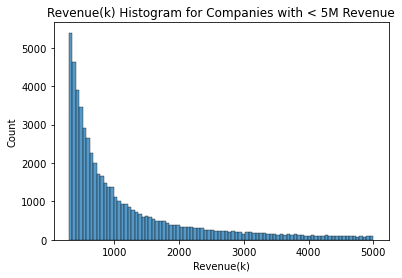

In [44]:
df2 = df[df['Revenue(k)'] < 5000]
sns.histplot(df2, x='Revenue(k)').set(title = 'Revenue(k) Histogram for Companies with < 5M Revenue')
